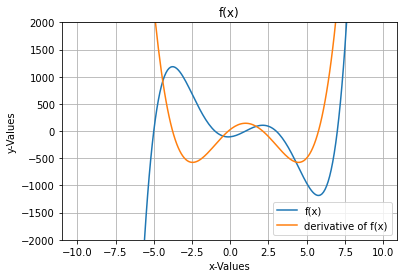

(array([-1.00000000e+01, -9.90000000e+00, -9.80000000e+00, -9.70000000e+00,
        -9.60000000e+00, -9.50000000e+00, -9.40000000e+00, -9.30000000e+00,
        -9.20000000e+00, -9.10000000e+00, -9.00000000e+00, -8.90000000e+00,
        -8.80000000e+00, -8.70000000e+00, -8.60000000e+00, -8.50000000e+00,
        -8.40000000e+00, -8.30000000e+00, -8.20000000e+00, -8.10000000e+00,
        -8.00000000e+00, -7.90000000e+00, -7.80000000e+00, -7.70000000e+00,
        -7.60000000e+00, -7.50000000e+00, -7.40000000e+00, -7.30000000e+00,
        -7.20000000e+00, -7.10000000e+00, -7.00000000e+00, -6.90000000e+00,
        -6.80000000e+00, -6.70000000e+00, -6.60000000e+00, -6.50000000e+00,
        -6.40000000e+00, -6.30000000e+00, -6.20000000e+00, -6.10000000e+00,
        -6.00000000e+00, -5.90000000e+00, -5.80000000e+00, -5.70000000e+00,
        -5.60000000e+00, -5.50000000e+00, -5.40000000e+00, -5.30000000e+00,
        -5.20000000e+00, -5.10000000e+00, -5.00000000e+00, -4.90000000e+00,
        -4.8

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#method to calculate the y values
def calculate_Y_values(values, coefficients):
    n = len(coefficients)
    y_values = []
    for x in values:                             #for all x values in the given intervall do:
        y = 0                                    #reset the y value after every loop
        reps = n - 1                             #order of the polynom
        for k in coefficients:                   
            y += coefficients[reps] * x**reps    #sum all the values of the polynom
            reps -= 1
        y_values.append(y)
    return y_values

#first derivative
def derivative(coefficients):
    n = len(coefficients)
    copy_coefficient = np.copy(coefficients)
    reps = n - 1
    while reps >= 0:
        copy_coefficient[reps] = coefficients[reps] * reps
        reps -= 1
    derivative_coefficient = np.copy(copy_coefficient[1:])    
    return derivative_coefficient

#first antiderivative
def antiderivative(coefficients):
    copy_coefficient = np.copy(coefficients).astype(np.float32)
    copy_coefficient = np.insert(copy_coefficient, 0, 0.0)
    n = len(copy_coefficient)
    reps = n - 1
    divisor = n - 1.0
    while reps >= 0:
        copy_coefficient[reps] = np.divide(copy_coefficient[reps], divisor)
        reps -= 1
    antiderivative_coefficient = np.copy(copy_coefficient)
    return antiderivative_coefficient

#derivate the polynom n times
def n_derivative(n, coefficients):
    result = np.copy(coefficients)
    while n > 0:
        n -= 1
        coefficients = derivative(coefficients)
        result = n_derivative(n, coefficients)
    if n == 0:
        return result

def IT21ta_ZH04_S1_Aufg2(a, xmin, xmax):
    
    if len(a) == 0:
        raise Exception('Error. Input array has to be a row- or columnvector.')

    #last element of the array is the coefficient of the highest order x
    #example: 5x^2 + 3x - 5 => [-5, 3, 5]
    base_coefficients = np.copy(a)

    #enter the lower and upper bound of the x-interval 
    x_axis = np.arange(xmin, xmax, 0.1)

    #calculating y values
    p = calculate_Y_values(x_axis, base_coefficients)
    
    #calculating dy values
    derivative_coefficients = np.copy(n_derivative(1, base_coefficients))
    dp = calculate_Y_values(x_axis, derivative_coefficients)
    
    #calculating Y values
    antiderivative_coefficients = antiderivative(base_coefficients)
    pint = calculate_Y_values(x_axis, antiderivative_coefficients)    
    
    #plotting
    plt.plot(x_axis, p, label = "f(x)")
    plt.plot(x_axis, dp, label = "derivative of f(x)")
    #plt.plot(x_axis, pint, label = "antiderivative of f(x)")
    plt.xlabel("x-Values")
    plt.ylabel("y-Values")
    plt.title("f(x)")
    plt.legend()
    plt.grid()
    plt.xlim()
    plt.ylim(-2000, 2000)
    plt.show()
    
    return(x_axis, p, dp, pint)

IT21ta_ZH04_S1_Aufg2(np.array([-105, 29, 110, -30, -5, 1]), -10, 10)